# Data Preprocessing
---

Data Preprocessing is critical first step in data analysis. It provide valuble insight of data and its relation.

Following objectives are accomplished in this file:

## - [Checked for  Missing values](#1)
## - [Data Statistics](#stat)
## - [Remove Outliers](#2)
## - [Feature Selection](#3)


In [1]:
# import libraries

import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import math

from sklearn.linear_model import LinearRegression
from sklearn import linear_model

In [2]:
# Ignore Warnings 
warnings.filterwarnings("ignore")

#to see all the columns
pd.set_option('display.max_columns',30) 

### Read Data

In [3]:
# read the data
train = pd.read_csv("./data/train.csv")
dev = pd.read_csv("./data/dev.csv")

In [4]:
# Removing the ID feature :
train.drop('id',axis=1,inplace=True)
dev.drop('id',axis=1,inplace=True)

In [5]:
# split date to month day and year
for i in [train,dev]:
    i['month'] = i.date.map(lambda x : int(x.split('/')[0]))
    i['day'] = i.date.map(lambda x : int(x.split('/')[1]))
    i['year'] = i.date.map(lambda x : int(x.split('/')[2]))
    i.drop('date',axis=1,inplace=True)

In [6]:
# adding an additional features
train['yr_dif']=train['year']-train['yr_built']
dev['yr_dif']=dev['year']-dev['yr_built']


In [7]:
# view
train.head(5)

,dummy,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,month,day,year,yr_dif
0,1,4,2.50,2720,10006,2.0,0,0,3,9,2720,0,1989,0,98074,47.6295,-122.042,2720,10759,5.9495,7,9,2014,25
1,1,2,2.50,2600,5000,1.0,0,0,5,8,1300,1300,1926,0,98126,47.5806,-122.379,2260,5000,6.6500,7,18,2014,88
2,1,5,1.75,1650,3000,1.5,0,0,3,8,1650,0,1902,0,98144,47.5955,-122.306,1740,4000,4.4300,7,7,2014,112
3,1,4,1.75,1720,9600,1.0,0,0,4,8,1720,0,1969,0,98059,47.4764,-122.155,1660,10720,3.8000,4,28,2015,46
4,1,6,2.25,3830,11180,1.0,0,2,5,9,2440,1390,1962,0,98008,47.5849,-122.113,2500,10400,8.8700,9,4,2014,52


In [8]:
train.columns

Index(['dummy', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price', 'month', 'day', 'year',
       'yr_dif'],
      dtype='object')

<a name='stat'><h1>
    Data Statistics 
    </h1>
    </a>

In [9]:
features = ['dummy', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price', 'month', 'day', 'year',
       'yr_dif']

num = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 
       'sqft_above','sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price', 'day',
       'yr_dif']

cat = ['floors','waterfront', 'view', 'condition', 'grade','month', 'year']


## Numerical features statistics

In [10]:
table1 = pd.DataFrame({'Feature':num,'Mean':train[num].mean(),'Max':train[num].max(),'Min':train[num].min(),\
              'Standard deviation':train[num].std()})
table1

,Feature,Mean,Max,Min,Standard deviation
bedrooms,bedrooms,3.375200,3.300000e+01,1.0000,0.943246
bathrooms,bathrooms,2.118875,7.750000e+00,0.5000,0.765128
sqft_living,sqft_living,2080.223200,9.890000e+03,370.0000,911.334358
sqft_lot,sqft_lot,15089.201400,1.651359e+06,572.0000,41203.894918
sqft_above,sqft_above,1793.099300,8.860000e+03,370.0000,830.865434
sqft_basement,sqft_basement,287.123900,2.720000e+03,0.0000,435.005264
yr_built,yr_built,1971.124900,2.015000e+03,1900.0000,29.480594
yr_renovated,yr_renovated,81.226700,2.015000e+03,0.0000,394.379804
zipcode,zipcode,98078.293100,9.819900e+04,98001.0000,53.518391
lat,lat,47.559814,4.777760e+01,47.1559,0.138651


## categorical feature statistics

In [11]:
d = {}
for i in cat:
    n = train[cat].nunique().max()-train[cat].nunique()[i]
    d[i.capitalize()+ " categories"] = list(train[i].value_counts(normalize=True).index)+[' ']*n
    d[i+" % examples"] = list(train[i].value_counts(normalize=True)*100)+[' ']*n
table2 = pd.DataFrame(d)
table2

,Floors categories,floors % examples,Waterfront categories,waterfront % examples,View categories,view % examples,Condition categories,condition % examples,Grade categories,grade % examples,Month categories,month % examples,Year categories,year % examples
0,1.0,48.59,0,99.3,0,90.3,3,65.3,7,41.3,5,11.23,2014,68.15
1,2.0,38.68,1,0.7,2,4.25,4,25.69,8,28.38,7,10.37,2015,31.85
2,1.5,8.93,,,3,2.5,5,8.12,9,11.82,6,10.30,,
3,3.0,2.99,,,1,1.62,2,0.76,6,9.33,4,10.08,,
4,2.5,0.78,,,4,1.33,1,0.13,10,5.47,10,8.87,,
5,3.5,0.03,,,,,,,11,2.1,8,8.74,,
6,,,,,,,,,5,1.05,3,8.46,,
7,,,,,,,,,12,0.39,9,8.38,,
8,,,,,,,,,4,0.11,12,6.84,,
9,,,,,,,,,13,0.05,11,6.44,,


<a name='1'><h1>
Check for missing values
    </h1>
</a>

In [12]:
# missing values in train
if train.isnull().sum().sum()==0:
    print('no missing value in train set')
else:
    print(train.isnull().sum())

no missing value in train set


In [13]:
# missing values in dev
if dev.isnull().sum().sum()==0:
    print('no missing value in dev set')
else:
    print(dev.isnull().sum())

no missing value in dev set


<a name='2'><h1>
Remove Outliers
    </h1>
</a>

In [15]:
num = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 
       'sqft_above','sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price', 'day',
       'yr_dif']

l={}
h={}

for i in num:
    l[i]=train[i].quantile(0.01)
    h[i]=train[i].quantile(0.99)

for i in num:
    train= train[(train[i] <= h[i]) & (train[i] >=l[i])] # inplace removal of outliers

train.shape

(7148, 24)

<a name='3'><h1>
Feature Selection
    </h1>
</a>

If we have # of features less than observations(i.e. # of rows) then it is called "indeterminate system ".(In Linear regression)

If we have # of features more than observations, then we can run into overfitting issue.

If we have __too many features__ than it is very difficult to cluster the observations. Every observation appears to equi-distance from all other. This is a big problem. If all distances are equal than all observations are appears equally different and no meaningful cluster(pattern) can be formed. This is called __Curse of Dimensionality.__ 

1. Graphical Analysis
2. Abalation Analysis
3. Correlation matrix
4. Principle Component Analysis* (PCA)
5. Linear Discriminant Analysis* (LDA)
6. UMAP*
7. Autoencoder*

## 1. Graphical Analysis

- In this analysis, we explore histogram and scattered plot. 
- From Scatter plot, highly non-linearly realted features can be dropped.
- From Histogram, we check for skewness in data or unbalanced categorical data. 

These analysis provide better insight of features. 

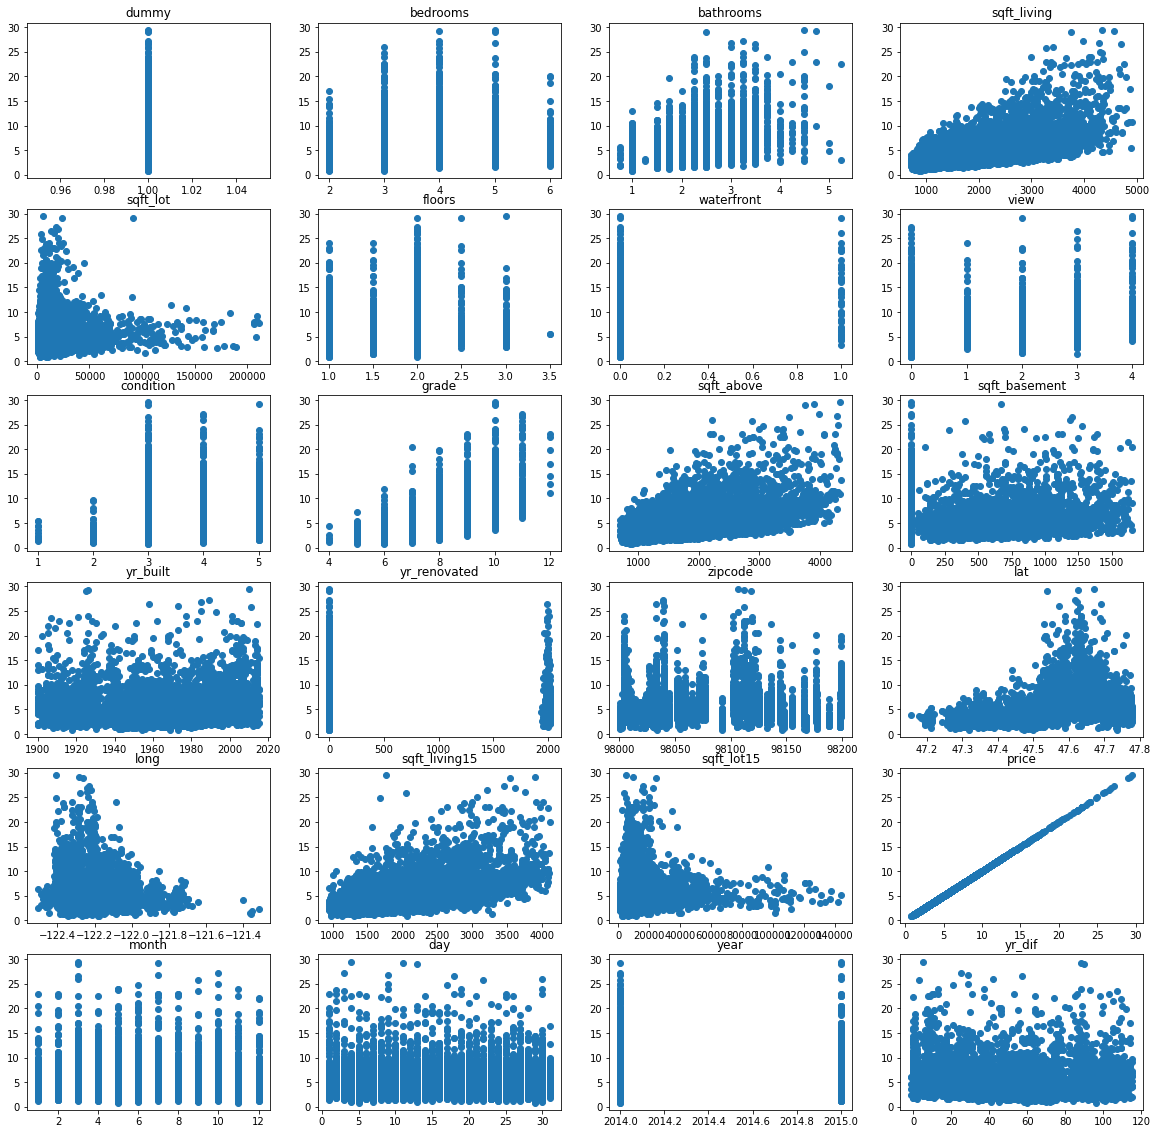

In [32]:
fig,ax=plt.subplots(math.ceil(len(train.columns)/4),4,figsize=(20,20))
row=0
col=0
for i in train.columns:
    ax[row,col].scatter(train[i],train['price'])
    ax[row,col].set_title(i)
    col+=1
    if col==4:
        row+=1
        col=0

plt.savefig('./images/Scatter_plot.png', dpi=600)
    

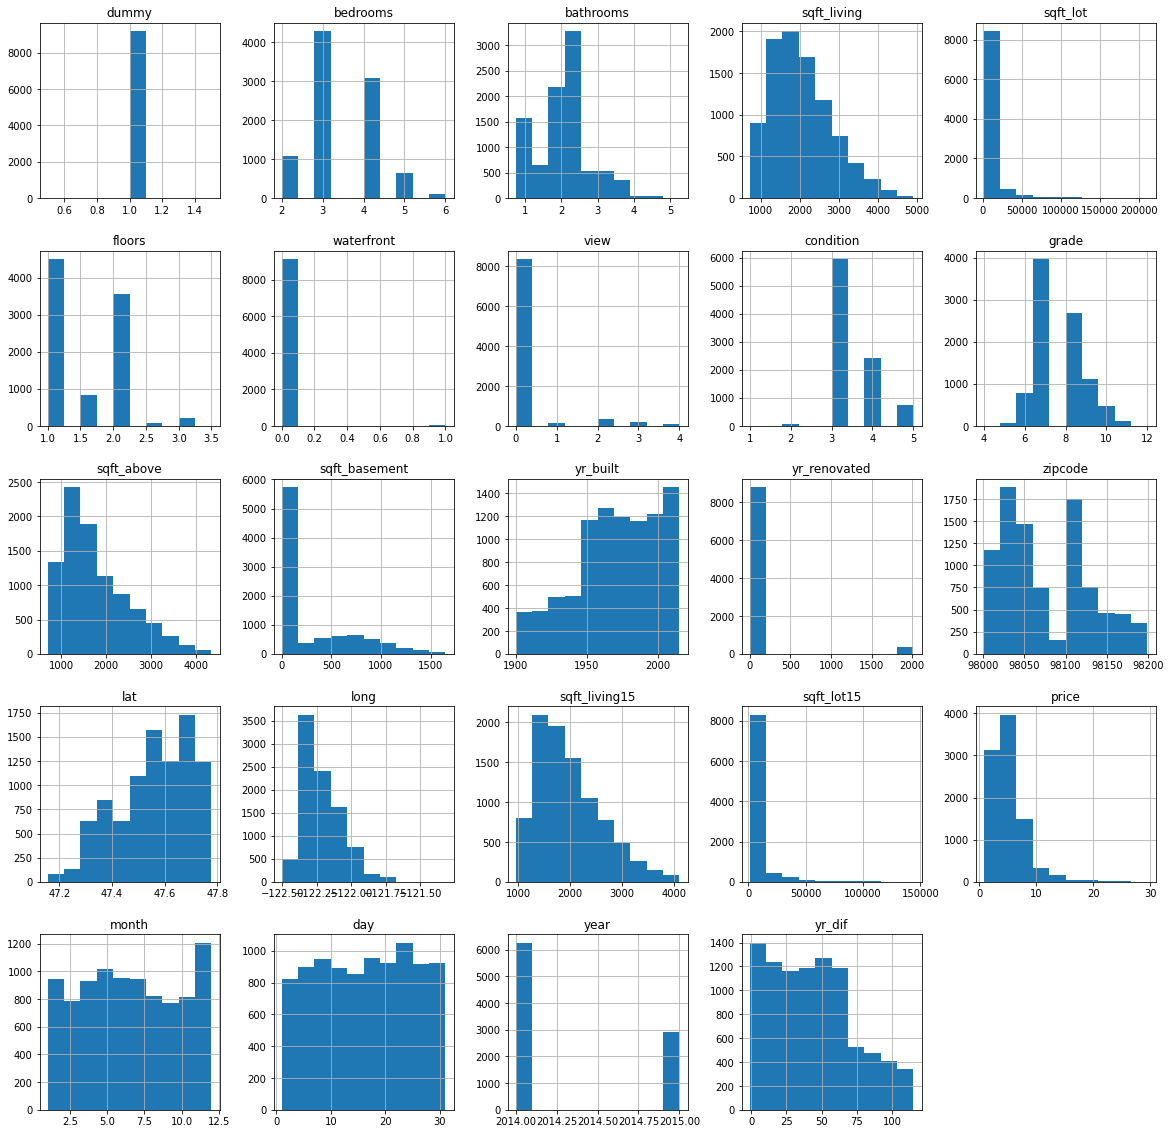

In [33]:
# histogram of all colums
train.hist(figsize=(20,20))
plt.savefig('./images/histograms.png', dpi=600)
    

## 2. Abalation analysis

- __Base Case:__ No feature is dropped.
- Drop features one by one and record regression accuracy. This is known as "Ablation Analysis".
- Many features are correlated. Therfore, we can not reject features based on Abalation analysis. It gives us features which are very important and can cause significant drop in accuracy if not included.


In [16]:
# data split
# X and Y
Y_train=train['price']
X_train=train.loc[:,~train.columns.isin(['price','dummy'])]


X_dev=dev.loc[:,~dev.columns.isin(['price','dummy'])]
Y_dev=dev['price']

In [17]:
# Normalization
# without individual drop of features
normalization=preprocessing.StandardScaler().fit(X_train.loc[:,~X_train.columns.isin(['dummy'])])
# normalization=preprocessing.MinMaxScaler().fit(X_train.loc[:,~X_train.columns.isin(['dummy'])])

X_train_norm=normalization.transform(X_train.loc[:,~X_train.columns.isin(['dummy'])])
X_dev_norm=normalization.transform(X_dev.loc[:,~X_dev.columns.isin(['dummy'])])


In [34]:
# Ridge REgression model with 
reg=linear_model.Ridge(alpha=0.5)
# reg=linear_model.Lasso(alpha=0.01)

result={}

reg.fit(X_train_norm,np.log(Y_train))
result['None']=reg.score(X_dev_norm,np.log(Y_dev))
    
for i in X_train.columns[~X_train.columns.isin(['dummy'])]:
    # Normalization
    normalization=preprocessing.StandardScaler().fit(X_train.loc[:,~X_train.columns.isin(['dummy',i])])
    # normalizing train/dev
    X_train_norm=normalization.transform(X_train.loc[:,~X_train.columns.isin(['dummy',i])])
    X_dev_norm=normalization.transform(X_dev.loc[:,~X_dev.columns.isin(['dummy',i])])

    reg.fit(X_train_norm,np.log(Y_train))
    result[i]=reg.score(X_dev_norm,np.log(Y_dev))

result=pd.DataFrame(result,index=['Performance']).T # transpose

In [35]:
result.round(5)

,Performance
None,0.77270
bedrooms,0.77233
bathrooms,0.76855
sqft_living,0.77270
sqft_lot,0.77250
floors,0.76934
waterfront,0.77020
view,0.76712
condition,0.76813
grade,0.73178


## 3. Correlation matrix

- compute correlation matrix
- using Seaborn's heatmap, determine highly correlated features

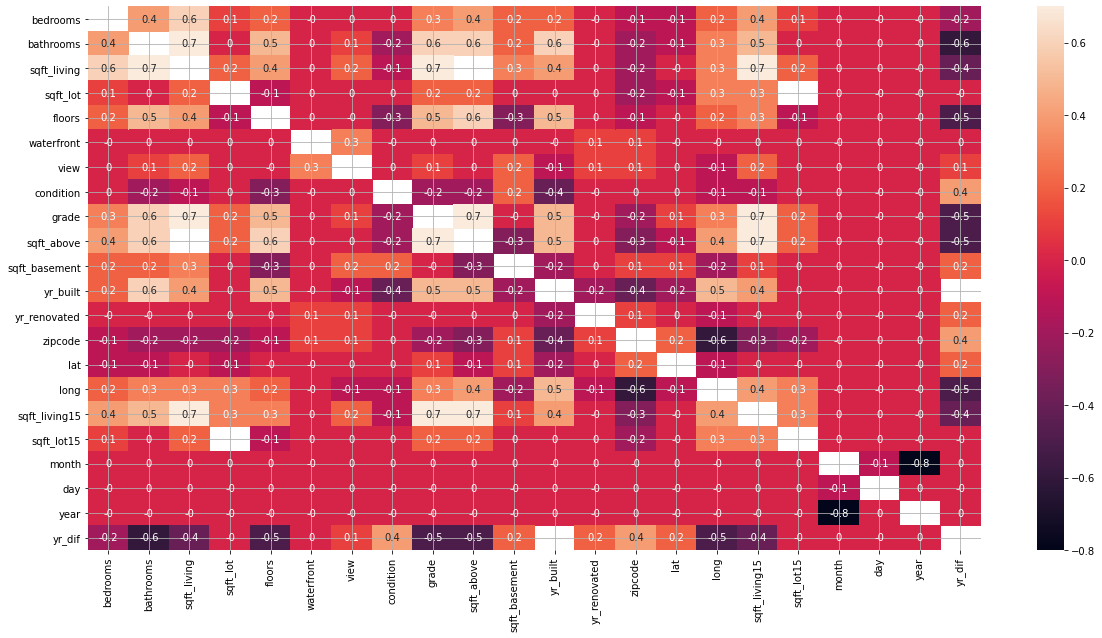

In [22]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(20,10))
corr = X_train.corr()
korr = corr[abs(corr)>=.75]
sns.heatmap(corr.round(1),annot=True, ax=ax, mask = (np.abs(korr) >= 0.8))
plt.grid(True)
# plt.savefig('./images/correlation.png', dpi=600)
# plt.figure(figsize=(10,10))

## 4. Principle Component analysis

- This is __unsupervised__ technique to reduce number of features. In this method, we remove dimensions that has very low covariance.
- Principle componenets are the vectors that defines a new cordinate system where first axis goes along highest variance and second axis goes along second highest variance and so on. 
- We can ignore least variance dimension and reduce dimensionality of the data.
- There are two methods we can test this analysis.
1. Using Scikit libraries
2. Using Covariance matrix and EigenValues

### 4.1 Using Scikit Libraries

### 4.2 Covariance Matrix and EigenValues

Why we use covariance matrix to get directions of maximum variance?
- Solution [https://www.youtube.com/watch?v=Axs-fuFJVvE]

Just to be clear, eigenvalues and eigenvectors gi

Steps:
1. covariance matrix <= cov(X), where X is normalized dataset with D dimensionality
2. get eignvalue decomposition cov = [V][A][V]^-1 
3. select top highest d eigenvalues and corresponding eigenvectors

Since we have normalized (all have unit variance). That means correlation is same as covariance.
$
Correlation = \frac{covariance(x,y)}{\sigma_x * \sigma_y} 
$ 

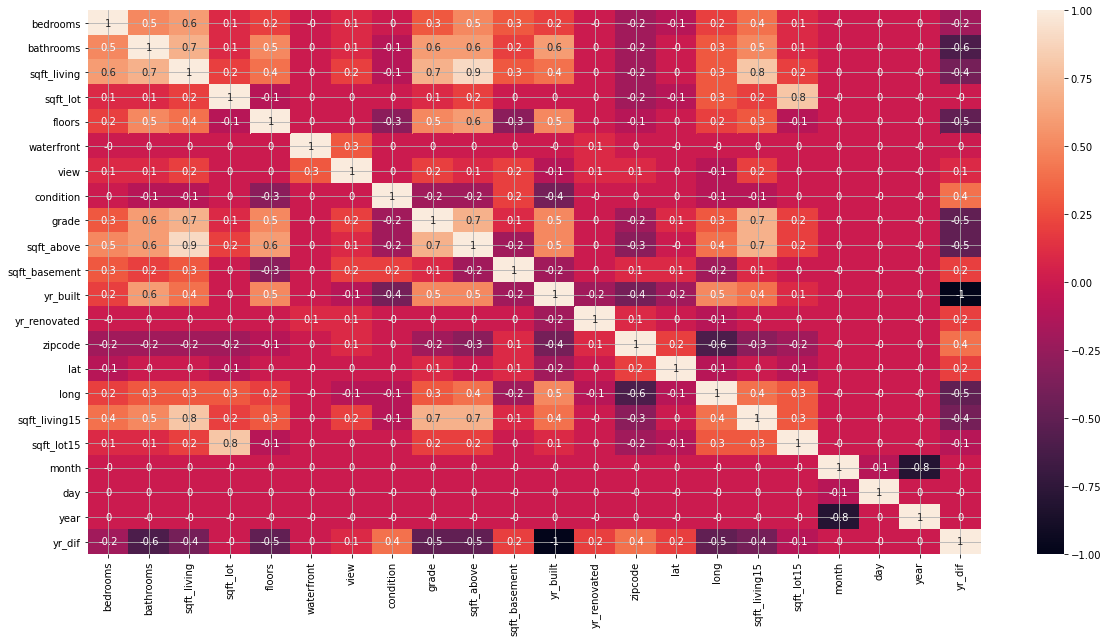

In [30]:
# covariance Matrix
%matplotlib inline
features = X_train.columns 
fig, ax = plt.subplots(figsize=(20,10))
cov_mat = pd.DataFrame(X_train_norm, columns = features).cov()
sns.heatmap(cov_mat.round(1),annot=True, ax=ax)#, mask = (np.abs(correlation) >= 0.8))
plt.grid(True)
# plt.savefig('./images/covariance_matrix.png', dpi=600)
# plt.figure(figsize=(10,10))

In [65]:
# Eigenvalues 
e_values, e_vectors = np.linalg.eig(cov_mat)
e_values

array([ 5.71797045e+00,  2.36699367e+00,  1.98907297e+00,  1.78932694e+00,
        1.33193952e+00,  1.18977609e+00,  1.02350457e+00,  9.97447312e-01,
        9.32682495e-01,  8.47464015e-01,  7.09278169e-01,  6.64246138e-01,
        5.27459734e-01,  4.10113668e-01,  3.70978297e-01,  2.48741180e-01,
        2.05431193e-01,  2.16199340e-01,  2.25036549e-01,  2.38925027e-01,
       -7.56621541e-16,  8.28575489e-17])

In [66]:
# sort them decereasing order e_values and corrresponding e_vector
idx = e_values.argsort()[::-1] # sort in decreasing order

e_values = e_values[idx]
e_vectors = e_vectors[:,idx]

e_vectors.shape # 22 vectors of size 22x1 size

(22, 22)

In [67]:
# Selection of features
# there are 9 e_values are less than 0.5. Lets remove them.
D = 22 # orignal dimensions
d = D-4 # new reduced dimensions
e_values_selected = e_values[0:d]
e_vectors_selected = e_vectors[:,0:d]

e_values_selected

array([5.71797045, 2.36699367, 1.98907297, 1.78932694, 1.33193952,
       1.18977609, 1.02350457, 0.99744731, 0.9326825 , 0.84746401,
       0.70927817, 0.66424614, 0.52745973, 0.41011367, 0.3709783 ,
       0.24874118, 0.23892503, 0.22503655])

In [68]:
# new dataset
X_train_norm_reduced = np.matmul(X_train_norm,e_vectors_selected)
X_dev_norm_reduced = np.matmul(X_dev_norm,e_vectors_selected)
X_train_norm_reduced.shape

(8504, 18)

In [69]:
# apply Ridge REgression model with 
reg=linear_model.Ridge(alpha=0.5)
# reg=linear_model.Lasso(alpha=0.01)

reg.fit(X_train_norm_reduced,np.log(Y_train))
reg.score(X_dev_norm_reduced,np.log(Y_dev))

0.7698572280355415

## 5. Linear Discriminent Analysis (LDA)

Tutorial: [https://people.revoledu.com/kardi/tutorial/LDA/Numerical%20Example.html]
[https://www.youtube.com/watch?v=mtTVXZq-9gE]

- This is Supervised dimensionality reduction method. 
- Use it for Classification problem.
- 

## 6. UMAP - Uniform Manifold Approximation and Projection

[https://towardsdatascience.com/dimensionality-reduction-for-data-visualization-pca-vs-tsne-vs-umap-be4aa7b1cb29]



## Conclusion:

- Based on __abalation analysis__ , 'lat' is found to be one of the most important feature. Without 'lat', the accuracy of linear regression model drops significanlty.

- based on __Correlation matrix__, 'sqft_living' is highly correlated with 'sqft_above'. and dropping this feature does not causes loss of accuracy.

- Drop either 'sqft_lot' or 'sqft_lot15'. The variance of sqft_lot15 is very high from scatter plot and by dropping sq_lot improve accuracy. 

- grade and sqft_above are correalted to 0.8 . There is significant decrease in accuracy if grade is dropped. But, scatter plot shows both of them having good relation with price. Lets keep both of them.

- yr_diff is computed from yr_built. Based on domain knowledge, yr_built, year are important. Therefore yr_diff may not be needed.   


### Drop these features :  sqft_living ,  sqft_lot15, yr_dif, year

In [40]:
# drop features
train.drop(['sqft_living','sqft_lot15','yr_dif'], axis=1, inplace=True)
dev.drop(['sqft_living','sqft_lot15','yr_dif'], axis=1, inplace=True)
dev.shape

(5597, 21)

In [41]:
# save them in excel
train.to_csv("./data/filtered_train.csv", index=False)
dev.to_csv("./data/filtered_dev.csv", index=False)